In [355]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
import sklearn
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import warnings 
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import accuracy_score



#  Read the dataset into your environment

In [356]:
data = pd.read_csv(r"c:\Users\Student\Desktop\COHORT 3\exam_cohort3\exam_cohort3\data.csv")
print(data)

      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL             No  ...   
1        

#  Visually inspecting the missing values in my dataset

In [357]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


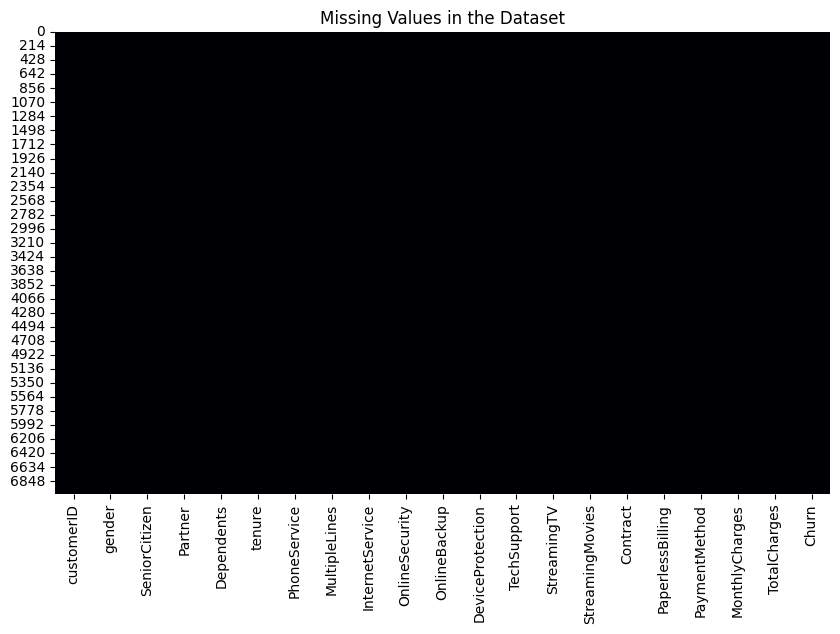

In [358]:
# Create a heatmap to visualize missing values
plt.figure(figsize=(10, 6))
#  The figsize parameter specifies the width and height of the figure in inches.were the 10 is the inches wide and 6 is height
sns.heatmap(data.isnull(), cmap='magma', cbar=False)
#the data.isnull() returns a DataFrame of the same shape as the original DataFrame (data), the cmap specifies the color map to be used for the heatmap.
#cbar=False specifies that no color bar (legend) should be shown alongside the heatmap.
plt.title('Missing Values in the Dataset')
#this is for the title
plt.show()
# And this shows 

# finding the size of my data

In [359]:
# number of rows and columns
matrix_size = data.shape
print( matrix_size)


(7043, 21)


# finding the number of variables in the matrix

In [360]:
# number of columns in the data set
print(len(data.columns))


21


#  Dropping unnecessary columns

In [361]:
# removing un necessary columns
unnecessary_columns = ['customerID', 'StreamingMovies','MultipleLines']
data.drop(columns=unnecessary_columns, inplace=True)
# drop() is the method for dropping the columns that are un necessary
#inplace=True this ensures that the changes are made directly to the DataFrame (data)

In [362]:
print(data)

      gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0     Female              0     Yes         No       1           No   
1       Male              0      No         No      34          Yes   
2       Male              0      No         No       2          Yes   
3       Male              0      No         No      45           No   
4     Female              0      No         No       2          Yes   
...      ...            ...     ...        ...     ...          ...   
7038    Male              0     Yes        Yes      24          Yes   
7039  Female              0     Yes        Yes      72          Yes   
7040  Female              0     Yes        Yes      11           No   
7041    Male              1     Yes         No       4          Yes   
7042    Male              0      No         No      66          Yes   

     InternetService OnlineSecurity OnlineBackup DeviceProtection TechSupport  \
0                DSL             No          Yes               No 

In [363]:
# Convert 'TotalCharges' column to numeric
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
#pd.to_numeric() this  function  is used for  conversion.

# Count the number of missing data points in the 'TotalCharges' column
missing_total_charges = data['TotalCharges'].isnull().sum()


# Fill missing values with the mean of the column
mean_total_charges = data['TotalCharges'].mean()
data['TotalCharges'].fillna(mean_total_charges, inplace=True)
print(data['TotalCharges'])

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64


C:\Users\Student\AppData\Local\Temp\ipykernel_10016\4185816985.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['TotalCharges'].fillna(mean_total_charges, inplace=True)


#  Transform the labels for the variable

In [364]:
# Replace '0' with 'No' and '1' with 'Yes' in 'SeniorCitizen' column
data['SeniorCitizen'] = data['SeniorCitizen'].map({0: 'No', 1: 'Yes'})
print(data['SeniorCitizen'])


0        No
1        No
2        No
3        No
4        No
       ... 
7038     No
7039     No
7040     No
7041    Yes
7042     No
Name: SeniorCitizen, Length: 7043, dtype: object


# NUMBER 3

# exploring the distribution of customer churn

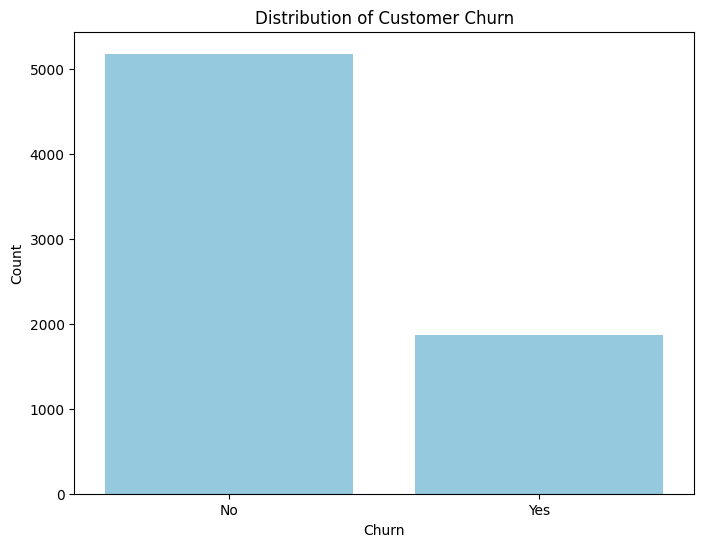

In [373]:
plt.figure(figsize=(8, 6))

sns.countplot(data=data, x='Churn',color='skyblue')
plt.title('Distribution of Customer Churn')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

The distribution of customer churn shows that the majority of customers in the dataset are non-churned ('No') and  This indicates that there are more customers who have not churned compared to those who have churned, which means This means that most of the customers in the dataset didn't leave the service ('No'), while a smaller number did ('Yes')

C:\Users\Student\AppData\Local\Temp\ipykernel_10016\2959892215.py:2: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:purple'` for the same effect.

  sns.countplot(data=data, x='gender', hue='Churn',color='purple')


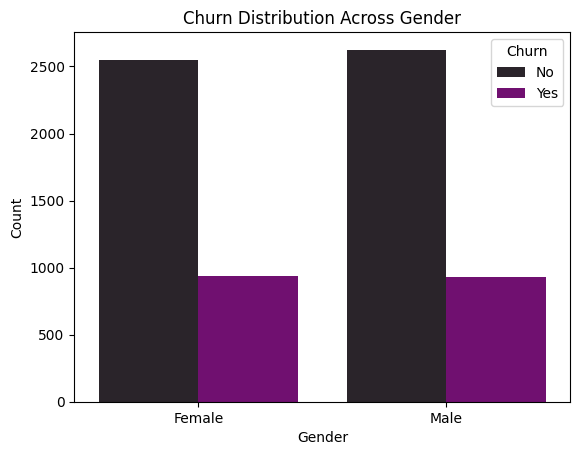

In [377]:
# (b) variation between churn and gender
sns.countplot(data=data, x='gender', hue='Churn',color='purple')
plt.title('Churn Distribution Across Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

The no for the males is higher than the no of the females this because the majority of male customers did not churn but the yes for the females is higher ,This suggests that females have a higher churn rate than males in the dataset

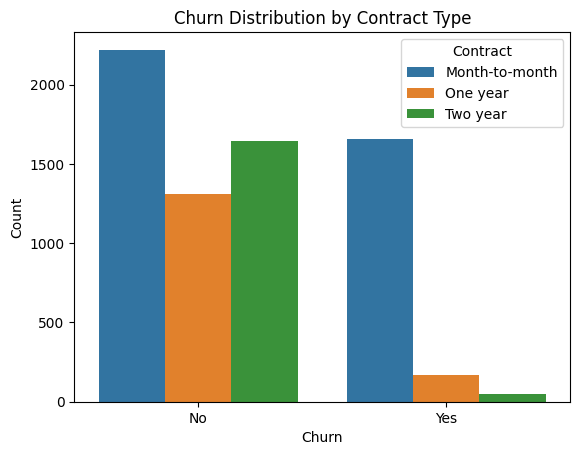

In [367]:
sns.countplot(x='Churn', hue='Contract', data=data)
plt.title('Churn Distribution by Contract Type')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.legend(title='Contract')
plt.show()


The instance of month to month for the no is higher than that for the yes because there are more instances of customers who did not churn ('No') compared to those who churned ('Yes')

The instance of one year for the no is higher than that of the yes because a larger proportion did not churn ('No') compared to those who churned ('Yes'), This suggests that customers with one-year contracts demonstrate a higher retention rate,

The instance of two years for the no is higher than that of the yes because a majority did not churn ('No') compared to those who churned ('Yes'). This indicates a high level of customer loyalty among those with longer-term contracts, 


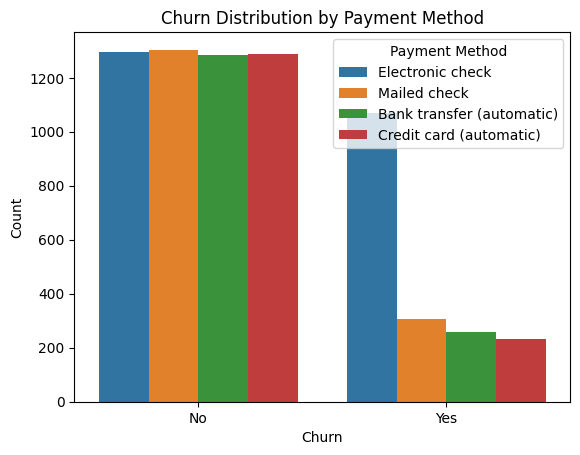

In [368]:
# (d) Churn distribution by payment method
sns.countplot(x='Churn', hue='PaymentMethod', data=data)
plt.title('Churn Distribution by Payment Method')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.legend(title='Payment Method')
plt.show()

It appears that customers who did not churn ('No') have a higher average payment amount compared to those who churned ('Yes'). This suggests that customers who are more financially invested in the service, perhaps due to higher payment amounts, are less likely to churn, indicating a positive correlation between payment amount and customer retention."


C:\Users\Student\AppData\Local\Temp\ipykernel_10016\2996710943.py:3: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:red'` for the same effect.

  sns.countplot(data=data, x='InternetService', hue='Churn', hue_order=['No', 'Yes'],color='red')


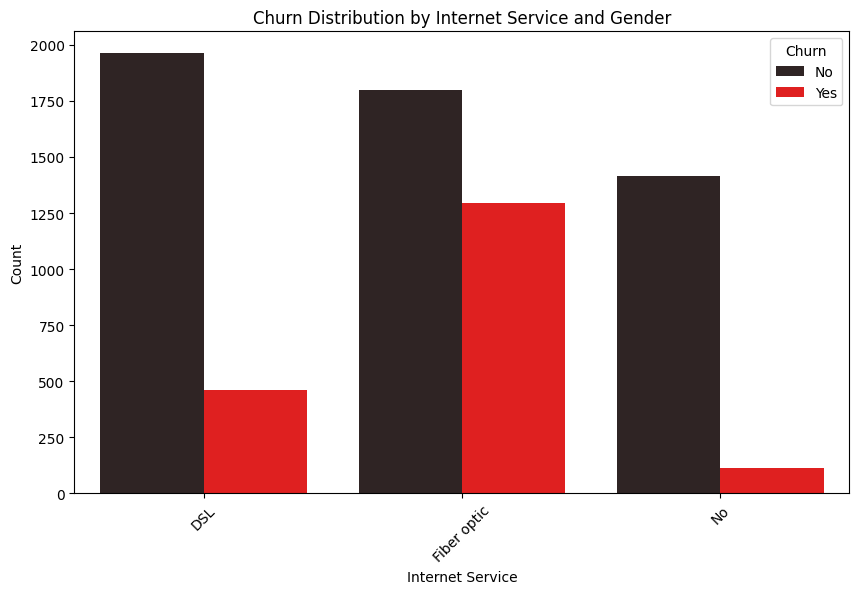

In [378]:
#(e) Churn distribution by internet service and gender
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='InternetService', hue='Churn', hue_order=['No', 'Yes'],color='red')
plt.title('Churn Distribution by Internet Service and Gender')
plt.xlabel('Internet Service')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

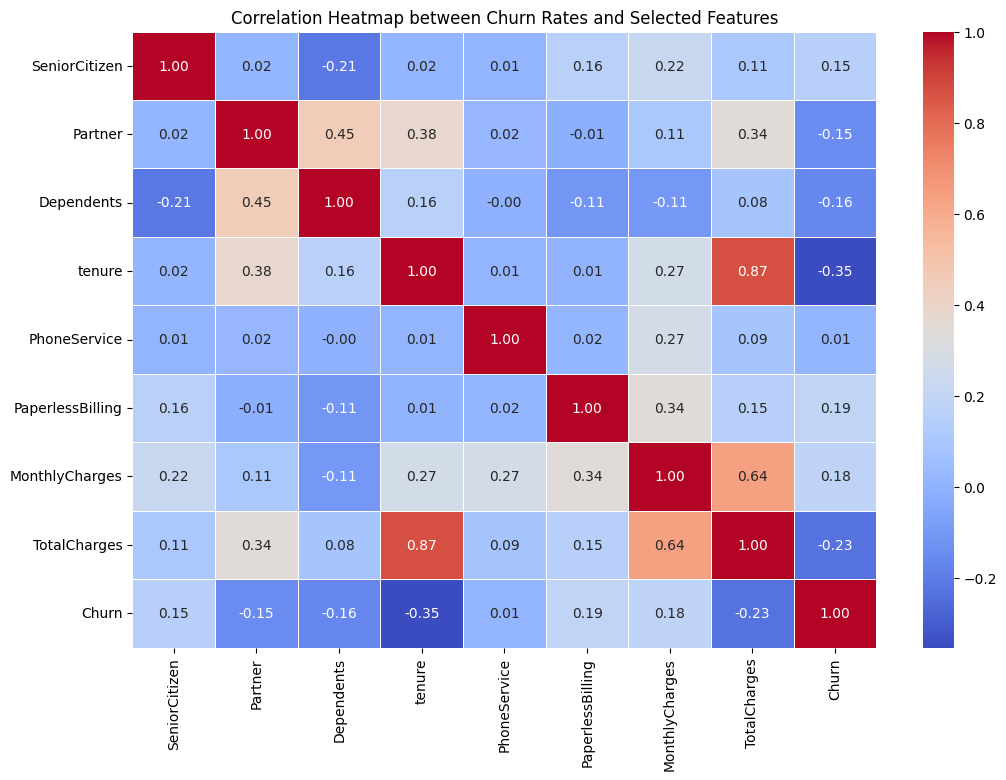

In [370]:

#specifying the features the 
selected_features = ['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 
                     'PhoneService', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn']

# Create a subset dataframe with the specified features
subset_data = data[selected_features].copy()

# Encoding categorical labels with numerical labels
label_encoder = LabelEncoder()
for feature in selected_features:
    subset_data[feature] = label_encoder.fit_transform(subset_data[feature])

# Calculate the correlation matrix
correlation_matrix = subset_data.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap between Churn Rates and Selected Features')
plt.show()

The  Darker colors indicate stronger correlations, while lighter colors indicate weaker correlations.
Positive correlations are usually represented by shades of red, while negative correlations are represented by shades of blue.
for the Positive correlation, When the values of one variable increase, the values of the other variable also tend to increase. 
for the Negative correlation, When the values of one variable increase, the values of the other variable tend to decrease. In a negative correlation.

# NUMBER FOUR

In [371]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline

X = data.drop(columns=['Churn', ])
y = data['Churn']

encoder = LabelEncoder()
X_encoded = X.copy()
for col in X.columns:
    if X[col].dtype == 'object':
        X_encoded[col] = encoder.fit_transform(X[col])

numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
scaler = StandardScaler()
X_encoded[numerical_features] = scaler.fit_transform(X_encoded[numerical_features])

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

logistic_model = LogisticRegression(max_iter=1000)
knn_model = KNeighborsClassifier()

logistic_pipeline = Pipeline([
    ('classifier', logistic_model)
])

knn_pipeline = Pipeline([
    ('classifier', knn_model)
])


In [372]:
from sklearn.model_selection import cross_val_score
import pandas as pd

models = [('Logistic Regression', logistic_pipeline), ('K-Nearest Neighbors', knn_pipeline)]
results = []

for name, model in models:
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='roc_auc')
    accuracy_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    results.append((name, cv_scores.mean(), cv_scores.std(), accuracy_scores.mean(), accuracy_scores.std()))

results_df = pd.DataFrame(results, columns=['Algorithm', 'ROC AUC Mean', 'ROC AUC STD', 'Accuracy Mean', 'Accuracy STD'])
print(results_df)


             Algorithm  ROC AUC Mean  ROC AUC STD  Accuracy Mean  Accuracy STD
0  Logistic Regression      0.839704     0.010995       0.796593      0.012083
1  K-Nearest Neighbors      0.775448     0.006848       0.763756      0.005380


Logistic Regression:
ROC AUC Mean: This metric, with a value of 0.8397, indicates that, on average, the Logistic Regression model has a strong ability to distinguish between churn and non-churn instances.
ROC AUC STD: The standard deviation associated with the ROC AUC scores is 0.011, suggesting moderate variability in model performance across different cross-validation folds.
Accuracy Mean: The average accuracy score of 0.7966 implies that the Logistic Regression model correctly predicts around 79.66% of instances.
Accuracy STD: The standard deviation of 0.0121 in accuracy across folds indicates slight variability in the accuracy of the model.

K-Nearest Neighbors (KNN):
ROC AUC Mean: KNN achieves a mean ROC AUC score of 0.7754, indicating a slightly weaker ability to discriminate between churn and non-churn instances compared to Logistic Regression.
ROC AUC STD: The standard deviation associated with KNN's ROC AUC scores is 0.0068, suggesting relatively low variability in performance across cross-validation folds.
Accuracy Mean: KNN's average accuracy score is 0.7638, which implies a slightly lower prediction accuracy compared to Logistic Regression.
Accuracy STD: The standard deviation of accuracy scores for KNN is 0.0054, indicating low variability across different folds.

Logistic Regression generally outperforms KNN in terms of both ROC AUC and accuracy metrics, achieving higher mean scores and exhibiting slightly lower variability across different cross-validation folds. This suggests that Logistic Regression is a more suitable model for predicting customer churn in this dataset. 








https://www.w3schools.com/python/python_ml_train_test.asp

https://www.geeksforgeeks.org/data-visualization-and-its-importance/